# Bibliothèques

In [15]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install -U scikit-learn

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn import tree
from joblib import dump, load

In [17]:
pip freeze > "../requirements.txt"

Note: you may need to restart the kernel to use updated packages.


# Préparation du jeu de données

In [13]:
# Importation du dataset et selection des colonnes
df = pd.read_csv('../Datasets/datasets finaux/dataset.csv', dtype={'IncidentNumber': object})
df = df.drop(["IncidentNumber", "DateOfCall"], axis = 1)

# # Suppression aléatoire de lignes (à utiliser pour tester les modèles les plus lents à s'entrainer)
#df = df.sample(frac = 0.03, random_state = 1)

# Standardisation des données numériques et encodage one-hot
scaler = StandardScaler()
df[["Distance", "AttendanceTimeSeconds"]] = scaler.fit_transform(df[["Distance", "AttendanceTimeSeconds"]])
df = pd.get_dummies(df, dtype="int")

# Séparation des variables explicatives et de la vcariable cible
X = df.drop("AttendanceTimeSeconds", axis = 1)
y = df.AttendanceTimeSeconds

# # Réduction de dimensions pour le GradientBoosting et le RandomTree
# pca = PCA(n_components = 80)
# X = pca.fit_transform(X)
# print(f"La part de variance expliquée est de {round(pca.explained_variance_ratio_.sum(), 2)}%")

# Division du dataset en datasets d'entrainement et de validation, les 20% d'enregistrements les plus récents serviront de dataset de validation
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train = X[:-round(0.2*len(X))]
X_test = X[-round(0.2*len(X)):]
y_train = y[:-round(0.2*len(y))]
y_test = y[-round(0.2*len(y)):]

# Modèlisation

## Régression linéaire

In [12]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

print('Score train :', model_lr.score(X_train, y_train))
print('Score test :', model_lr.score(X_test, y_test))
print('MSE train :', mean_squared_error(y_train, y_pred_train))
print('MSE test :', mean_squared_error(y_test, y_pred_test))
print('RMSE train :', root_mean_squared_error(y_train, y_pred_train))
print('RMSE test :', root_mean_squared_error(y_test, y_pred_test))

Score train : 0.4235946063530406
Score test : 0.48666741623426035
MSE train : 0.5715110091533611
MSE test : 0.5278884050754148
RMSE train : 0.7559834714815934
RMSE test : 0.7265592921953546


In [14]:
dump(model_lr, '../Models/LBF_LinearRegression')

['../Models/LBF_LinearRegression']

## SGDRegressor

In [8]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

y_pred_train = sgd.predict(X_train)
y_pred_test = sgd.predict(X_test)

print('Score train :', sgd.score(X_train, y_train))
print('Score test :', sgd.score(X_test, y_test))
print('MSE train :', mean_squared_error(y_train, y_pred_train))
print('MSE test :', mean_squared_error(y_test, y_pred_test))
print('RMSE train :', root_mean_squared_error(y_train, y_pred_train))
print('RMSE test :', root_mean_squared_error(y_test, y_pred_test))

coeffs = list(sgd.coef_)
coeffs.insert(0, sgd.intercept_)
feats = list(X.columns)
feats.insert(0, 'intercept')
pd.DataFrame({'valeur estimée' : coeffs}, index = feats)[:-1]

Score train : 0.43848534481748247
Score test : 0.4961335635317924
MSE train : 0.5567467112119293
MSE test : 0.5181538400835625
RMSE train : 0.7461546161566845
RMSE test : 0.7198290353157216


,valeur estimée
intercept,[0.09366256053156745]
Distance,0.678613
BoroughName_Barking And dagenham,-0.015559
BoroughName_Barnet,0.035412
BoroughName_Bexley,-0.175138
...,...
Hour_18,-0.006023
Hour_19,-0.072624
Hour_20,-0.152951
Hour_21,-0.173684


In [6]:
dump(sgd, '../Models/LBF_SGDRegressor')

['../Models/LBF_SGDRegressor']

## Ridge

In [7]:
ridge_reg = RidgeCV([0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])
ridge_reg.fit(X_train, y_train)

ridge_pred_train = ridge_reg.predict(X_train)
ridge_pred_test = ridge_reg.predict(X_test)

print('alpha sélectionné par c-v :', ridge_reg.alpha_)
print('score train :', ridge_reg.score(X_train, y_train))
print('score test :', ridge_reg.score(X_test, y_test))
print('MSE train :', mean_squared_error(ridge_pred_train, y_train))
print('MSE test :', mean_squared_error(ridge_pred_test, y_test))
print('RMSE train :', root_mean_squared_error(ridge_pred_train, y_train))
print('RMSE test :', root_mean_squared_error(ridge_pred_test, y_test))

coeffs = list(ridge_reg.coef_)
coeffs.insert(0, ridge_reg.intercept_)
feats = list(X.columns)
feats.insert(0, 'intercept')
pd.DataFrame({'valeur estimée' : coeffs}, index = feats)[:-1]

alpha sélectionné par c-v : 10.0
score train : 0.4299955840284182
score test : 0.4877451381877361
MSE train : 0.5651643835819429
MSE test : 0.5267801237367131
RMSE train : 0.7517741572985486
RMSE test : 0.7257961998637862


,valeur estimée
intercept,0.094908
Distance,0.683959
BoroughName_Barking And dagenham,-0.020568
BoroughName_Barnet,-0.011220
BoroughName_Bexley,-0.192005
...,...
Station_Name_Whitechapel,0.085967
Station_Name_Willesden,0.035222
Station_Name_Wimbledon,-0.318300
Station_Name_Woodford,-0.037895


In [8]:
dump(ridge_reg, '../Models/LBF_Ridge')

['../Models/LBF_Ridge']

## Lasso

Score train : 0.42450636827654065
Score test : 0.48501292178658395
MSE train : 0.5706069892001295
MSE test : 0.5295898136023838
RMSE train : 0.7553853249833025
RMSE test : 0.7277292172246376


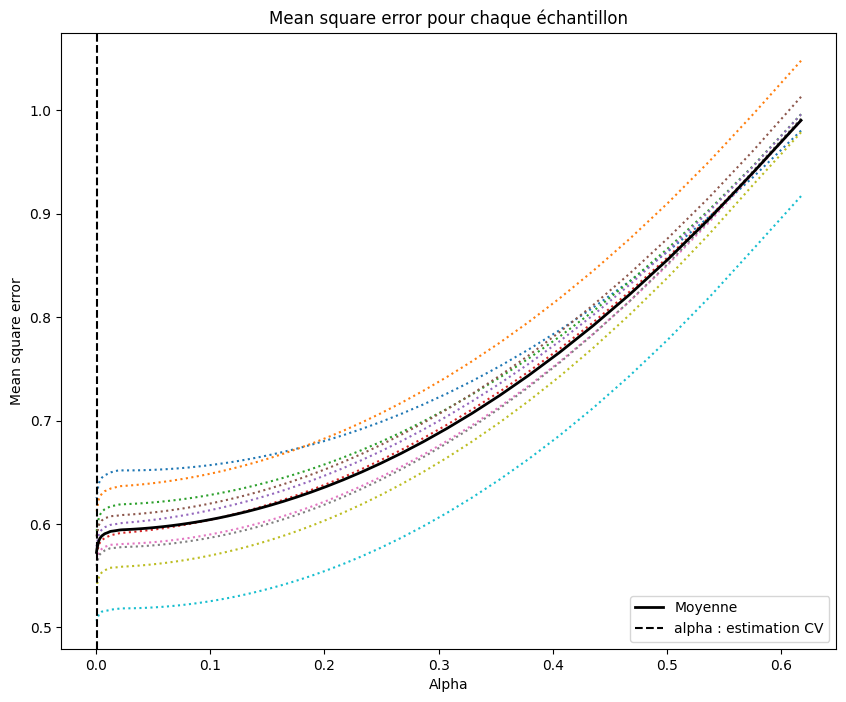

In [9]:
model_lasso = LassoCV(cv = 10).fit(X_train, y_train)

alphas = model_lasso.alphas_

plt.figure(figsize = (10, 8))

plt.plot(alphas, model_lasso.mse_path_, ':')
plt.plot(alphas, model_lasso.mse_path_.mean(axis = 1), 'k', label = 'Moyenne', linewidth = 2)

plt.axvline(model_lasso.alpha_, linestyle = '--', color = 'k', label = 'alpha : estimation CV')

plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon')
plt.legend();

pred_train = model_lasso.predict(X_train)
pred_test = model_lasso.predict(X_test)

print('Score train :', model_lasso.score(X_train, y_train))
print('Score test :', model_lasso.score(X_test, y_test))
print('MSE train :', mean_squared_error(pred_train, y_train))
print('MSE test :', mean_squared_error(pred_test, y_test))
print('RMSE train :', root_mean_squared_error(pred_train, y_train))
print('RMSE test :', root_mean_squared_error(pred_test, y_test))

In [10]:
dump(model_lasso, '../Models/LBF_Lasso')

['../Models/LBF_Lasso']

## ElasticNet

R2 score train : 0.42863844702672804
R2 score test : 0.4874829695572922
MSE train : 0.5665099968359895
MSE test : 0.5270497262995791
RMSE train : 0.7526685836648089
RMSE test : 0.7259819049394958
moyenne : 333.35824882448605
ecart-type : 115.69834103615455


,points_observés,points_predits
1475270,198.0,255.0
1475271,475.0,289.0
1475272,253.0,294.0
1475273,237.0,294.0
1475274,291.0,408.0
1475275,291.0,408.0
1475276,469.0,491.0


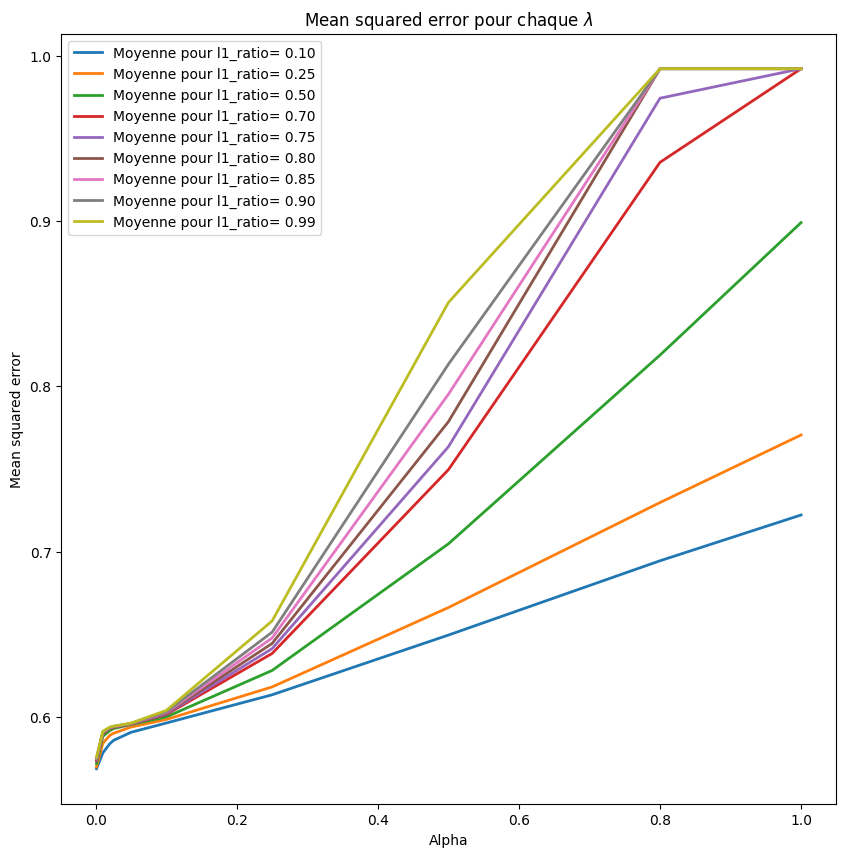

In [11]:
model_en = ElasticNetCV(cv = 8, l1_ratio = (0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99), alphas = (0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0))

model_en.fit(X_train, y_train)

coeffs = list(model_en.coef_)
coeffs.insert(0, model_en.intercept_)
feats = list(X.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index = feats)

alphas = model_en.alphas_

plt.figure(figsize = (10, 10))

for i in range(model_en.mse_path_.shape[0]) :
    plt.plot(alphas, model_en.mse_path_[i,:,:].mean(axis=1), label = 'Moyenne pour l1_ratio= %.2f' %model_en.l1_ratio[i], linewidth = 2)

plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.title('Mean squared error pour chaque $\lambda$')
plt.legend();

pred_train = model_en.predict(X_train)
pred_test = model_en.predict(X_test)

print('R2 score train :', model_en.score(X_train, y_train))
print('R2 score test :', model_en.score(X_test, y_test))
print("MSE train :", mean_squared_error(y_train, pred_train))
print("MSE test :", mean_squared_error(y_test, pred_test))
print("RMSE train :", root_mean_squared_error(y_train, pred_train))
print("RMSE test :", root_mean_squared_error(y_test, pred_test))

moy = scaler.mean_[-1]
ec = scaler.scale_[-1]
print('moyenne :', moy)
print('ecart-type :', ec)

pd.DataFrame({'points_observés': (y_test*ec)+moy, 'points_predits' : np.round((pred_test*ec)+moy)}, index = X_test.index).head(7)

In [12]:
dump(model_en, '../Models/LBF_ElasticNet')

['../Models/LBF_ElasticNet']

## Arbre de décision

#### Validation croisée

In [ ]:
param_grid = {
    'max_depth': [None, 10, 50],
    'min_samples_split': [1, 3, 5, 8, 15],
    'min_samples_leaf': [15, 25, 50]
}

# Créer un modèle DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

# Recherche des meilleurs hyperparamètres avec une validation croisée
grid_search = GridSearchCV(dt_model, param_grid, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire
dt_model = grid_search.best_estimator_
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

# Afficher les performances du modèle
print('R2 score train :', r2_score(y_train, y_pred_train))
print('R2 score test :', r2_score(y_test, y_pred_test))
print("MSE train :", mean_squared_error(y_train, y_pred_train))
print("MSE test :", mean_squared_error(y_test, y_pred_test))
print("RMSE train :", root_mean_squared_error(y_train, y_pred_train))
print("RMSE test :", root_mean_squared_error(y_test, y_pred_test))

#### Meilleur modèle

In [8]:
regr = DecisionTreeRegressor(max_depth = None, min_samples_split = 5, min_samples_leaf = 25)

tree_model = regr.fit(X_train, y_train)

y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)

print('R2 score train :', tree_model.score(X_train, y_train))
print('R2 score test :', tree_model.score(X_test, y_test))
print("MSE train :", mean_squared_error(y_train, y_pred_train))
print("MSE test :", mean_squared_error(y_test, y_pred_test))
print("RMSE train :", root_mean_squared_error(y_train, y_pred_train))
print("RMSE test :", root_mean_squared_error(y_test, y_pred_test))

moy = scaler.mean_[-1]
ec = scaler.scale_[-1]
print('Moyenne :', moy)
print('Ecart-type :', ec)

pd.DataFrame({'points_observés': (y_test*ec)+moy, 'points_predits' : np.round((y_pred_test*ec)+moy)}, index = X_test.index)

R2 score train : 0.5232720193056593
R2 score test : 0.5034040661594286
MSE train : 0.4726799789544335
MSE test : 0.5106771784462972
RMSE train : 0.6875172572048163
RMSE test : 0.714616805320374
Moyenne : 333.35824882448605
Ecart-type : 115.69834103615455


,points_observés,points_predits
1475270,198.0,254.0
1475271,475.0,282.0
1475272,253.0,279.0
1475273,237.0,279.0
1475274,291.0,396.0
...,...,...
1844082,148.0,266.0
1844083,381.0,454.0
1844084,395.0,393.0
1844085,484.0,434.0


In [9]:
dump(tree_model, '../Models/LBF_DecisionTreeModel')

['../Models/LBF_DecisionTreeModel']

#### Arbre affichable

R2 score train : 0.4221827938179932
R2 score test : 0.4883052303060589
MSE train : 0.572766750173478
MSE test : 0.5266724759189667
RMSE train : 0.7568135504689897
RMSE test : 0.7257220376418003
moyenne : 333.56592766345875
ecart-type : 115.90622523908323


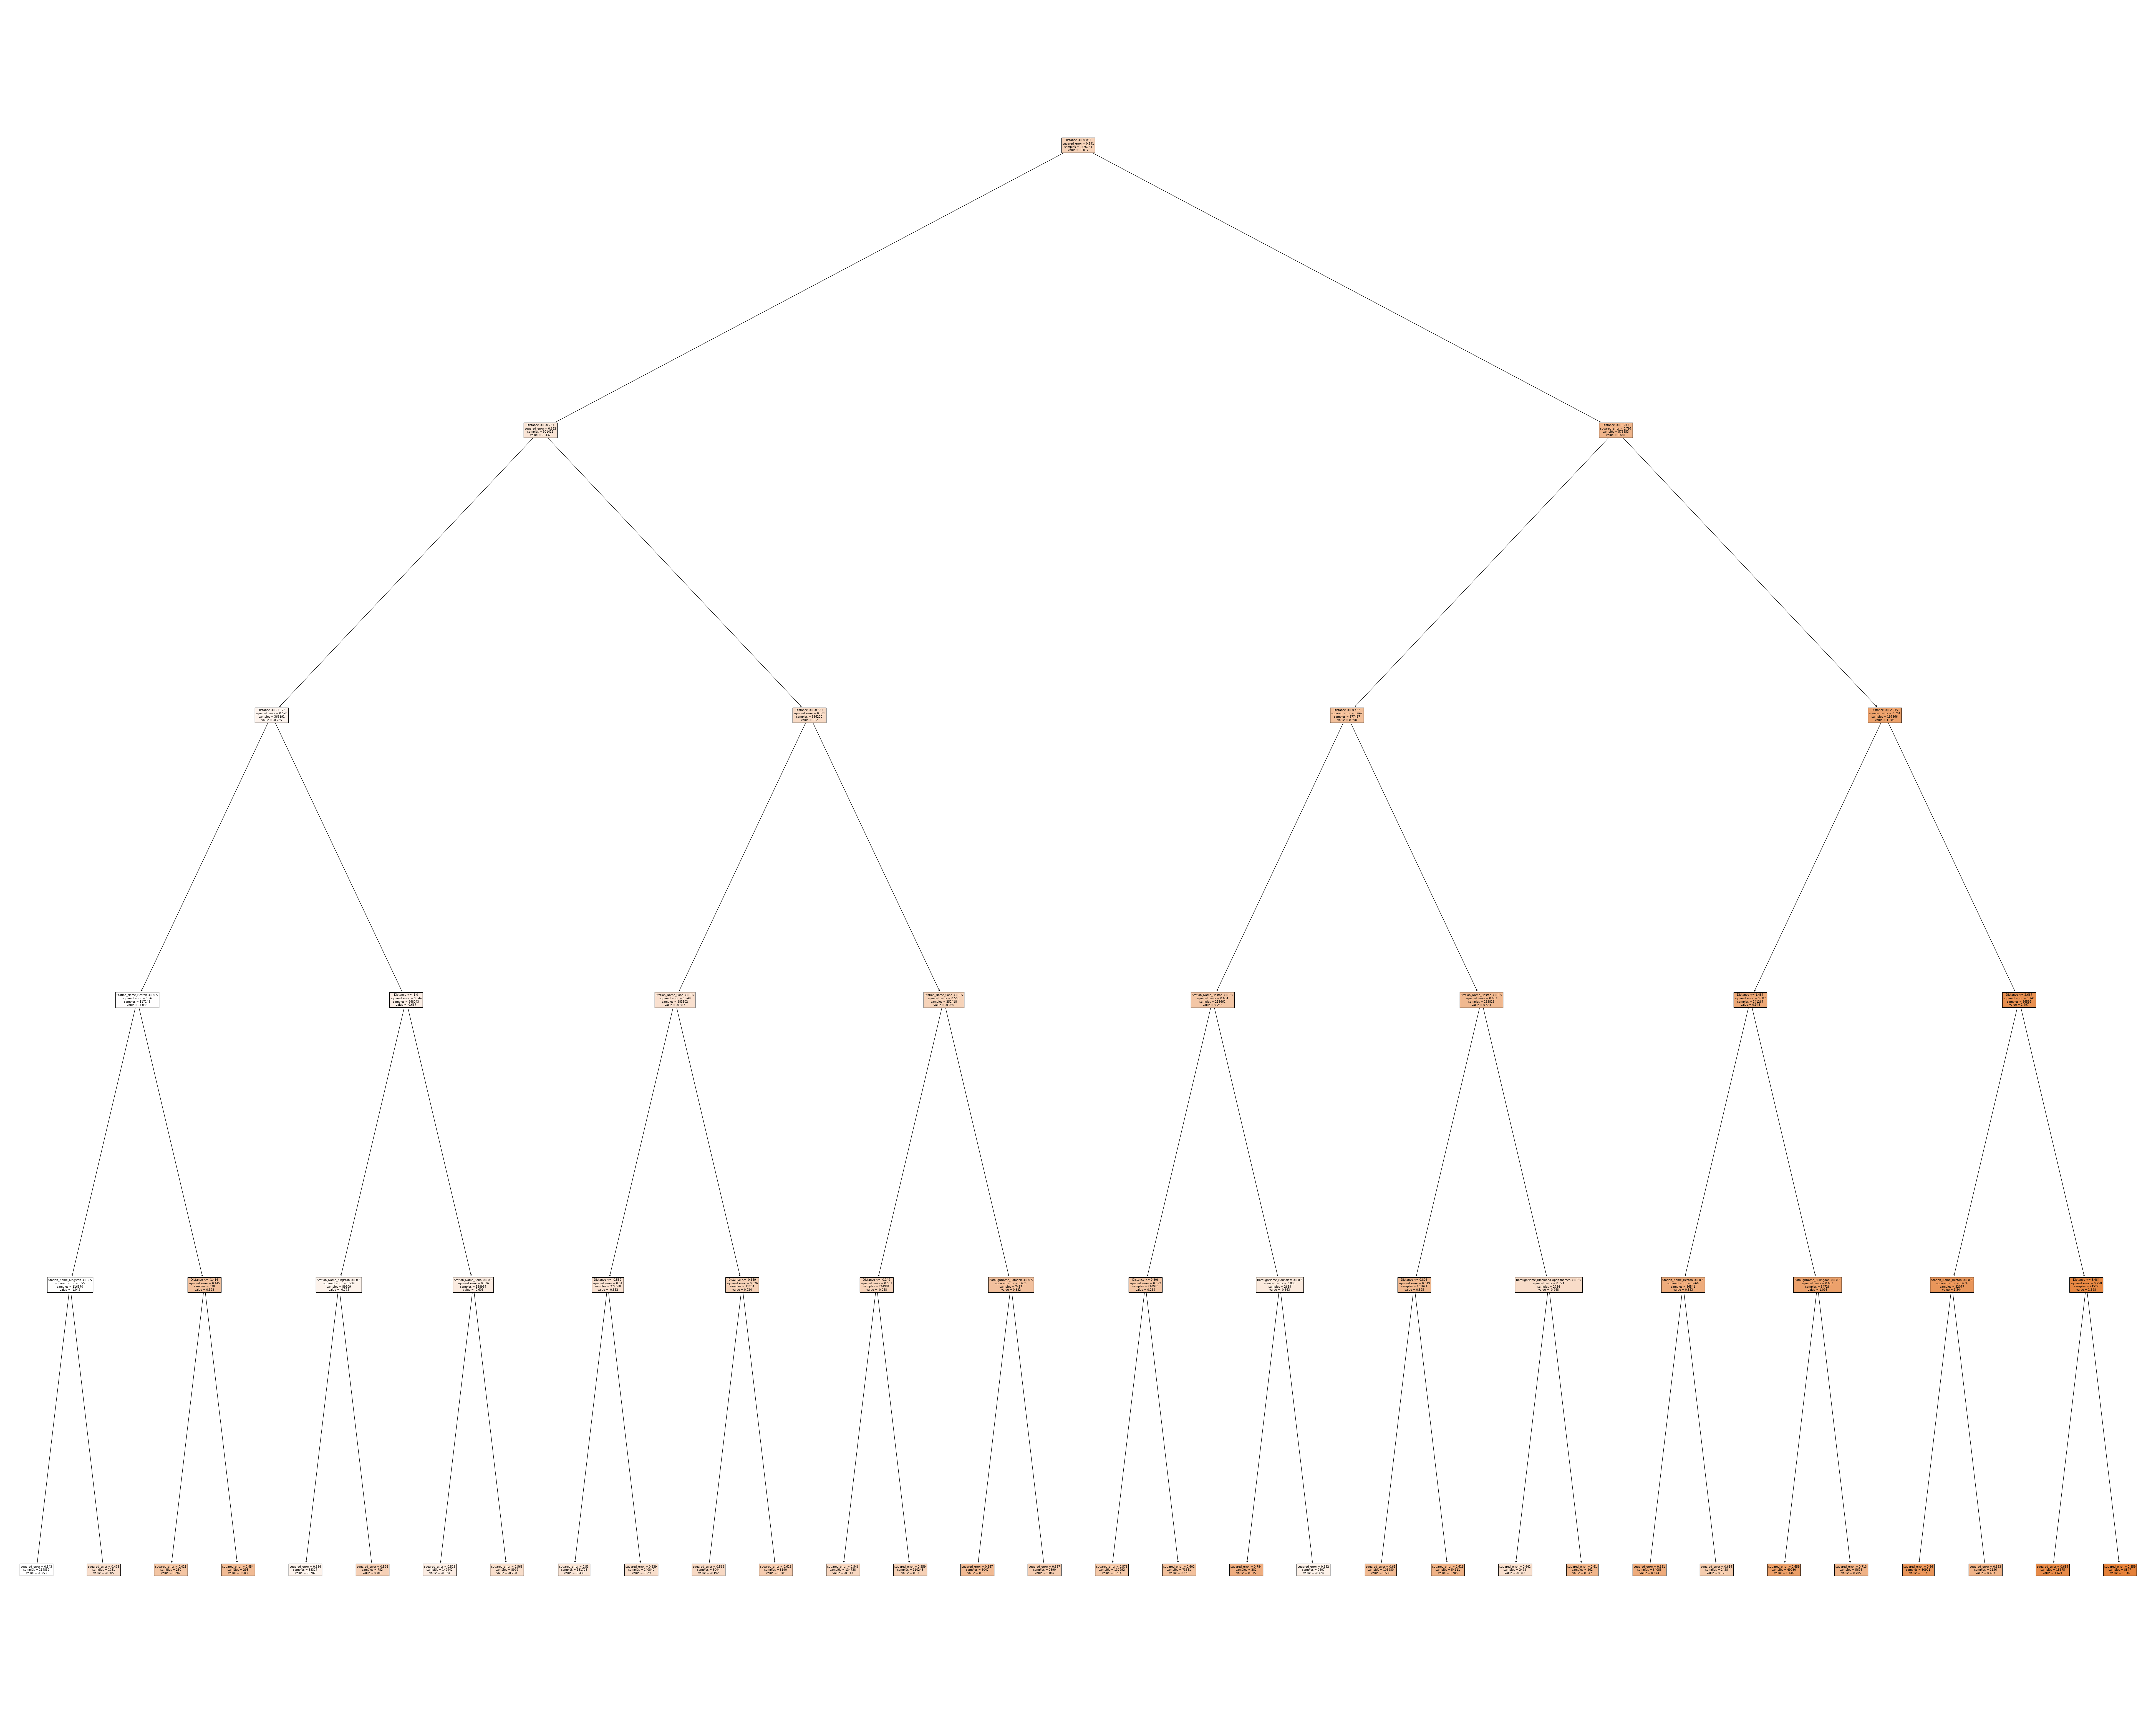

In [24]:
regr = DecisionTreeRegressor(max_depth = 5, min_samples_split = 5, min_samples_leaf = 25)

tree_model = regr.fit(X_train, y_train)

y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)

print('R2 score train :', tree_model.score(X_train, y_train))
print('R2 score test :', tree_model.score(X_test, y_test))
print("MSE train :", mean_squared_error(y_train, y_pred_train))
print("MSE test :", mean_squared_error(y_test, y_pred_test))
print("RMSE train :", root_mean_squared_error(y_train, y_pred_train))
print("RMSE test :", root_mean_squared_error(y_test, y_pred_test))

moy = scaler.mean_[-1]
ec = scaler.scale_[-1]
print('moyenne :', moy)
print('ecart-type :', ec)

fig = plt.figure(figsize = (100,80))
tree.plot_tree(regr, feature_names = X_test.columns, filled = True);

## GradientBoostingRegressor

#### Validation croisée

In [57]:
param_grid = {
    'n_estimators': [10, 25, 50],
    'learning_rate': [1, 5, 10],
    'max_depth': [1, 3]
}

gbr = GradientBoostingRegressor()

grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)


print("Meilleurs hyperparamètres:", grid_search.best_params_)

gbr = grid_search.best_estimator_

y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)

print('R2 score train :', r2_score(y_train, y_pred_train))
print('R2 score test :', r2_score(y_test, y_pred_test))
print("MSE train :", mean_squared_error(y_train, y_pred_train))
print("MSE test :", mean_squared_error(y_test, y_pred_test))
print("RMSE train :", root_mean_squared_error(y_train, y_pred_train))
print("RMSE test :", root_mean_squared_error(y_test, y_pred_test))

Meilleurs hyperparamètres: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 10}
R2 score train : 0.47400031130151987
R2 score test : 0.4525315716761743
MSE train : 0.5276062885482888
MSE test : 0.5407663777422502


#### Meilleur modèle

In [13]:
gbr = GradientBoostingRegressor(learning_rate = 1, n_estimators = 10, max_depth = 3)
gbr.fit(X_train, y_train)

y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)

print('R2 score train :', r2_score(y_train, y_pred_train))
print('R2 score test :', r2_score(y_test, y_pred_test))
print("MSE train :", mean_squared_error(y_train, y_pred_train))
print("MSE test :", mean_squared_error(y_test, y_pred_test))
print("RMSE train :", root_mean_squared_error(y_train, y_pred_train))
print("RMSE test :", root_mean_squared_error(y_test, y_pred_test))

R2 score train : 0.43476160134218667
R2 score test : 0.4915231639804891
MSE train : 0.5604388355654673
MSE test : 0.5228949699920595
RMSE train : 0.7486246292805676
RMSE test : 0.7231147695850635


In [14]:
dump(gbr, '../Models/LBF_GradientBoostingRegressor')

['../Models/LBF_GradientBoostingRegressor']

## Forêt aléatoire

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfr = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres:", grid_search.best_params_)


rfr = grid_search.best_estimator_

y_pred_train = rfr.predict(X_train)
y_pred_test = rfr.predict(X_test)

print('R2 score train :', r2_score(y_train, y_pred_train))
print('R2 score test :', r2_score(y_test, y_pred_test))
print("MSE train :", mean_squared_error(y_train, y_pred_train))
print("MSE test :", mean_squared_error(y_test, y_pred_test))
print("RMSE train :", root_mean_squared_error(y_train, y_pred_train))
print("RMSE test :", root_mean_squared_error(y_test, y_pred_test))

# Tests

## KFold

In [15]:
# Importation du dataset et selection des colonnes
df_test = pd.read_csv('../Datasets/datasets finaux/dataset.csv', dtype={'IncidentNumber': object})
df_test = df_test.drop(["IncidentNumber", "DateOfCall"], axis = 1)

# Sélectionner les colonnes avec des variables qualitatives
qualitative_cols = df_test.select_dtypes(include=['object']).columns

# Instancier LabelEncoder
le = LabelEncoder()

# Parcourir chaque colonne qualitative, encoder ses valeurs et remplacer la colonne originale
for col in qualitative_cols:
    df_test[col + '_encoded'] = le.fit_transform(df_test[col])
    df_test.drop(columns = [col], inplace = True)
    
# Afficher le DataFrame avec les colonnes encodées et les colonnes originales supprimées
print(df_test.head())

# Nombre de folds pour la validation croisée
n_splits = 5

# Initialiser le KFold
kf = KFold(n_splits = n_splits, shuffle = True, random_state = 42)

# Initialiser une liste pour stocker les scores (MSE) de chaque fold
scores4 = []

# Initialiser une liste pour stocker les prédictions de chaque fold
y_true_f = []
y_pred_f = []

# Séparer les fonctionnalités (features) et la variable cible (target) dans le DataFrame d'entraînement
X = df_test.drop(['AttendanceTimeSeconds'], axis = 1)
y = df_test['AttendanceTimeSeconds']

# Boucle sur les folds
for train_index, test_index in kf.split(X):
    # Diviser les données en ensembles d'entraînement et de test pour ce fold
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    # Normaliser les données avec StandardScaler
    scaler = MinMaxScaler()
    X_train_kf_scaled = scaler.fit_transform(X_train_kf)
    X_test_kf_scaled = scaler.transform(X_test_kf)
    # Initialiser et entraîner le modèle de régression par arbre de décision
    tree_model = DecisionTreeRegressor(min_samples_leaf = 50, min_samples_split = 3)
    tree_model.fit(X_train_kf_scaled, y_train_kf)
    # Faire des prédictions sur l'ensemble de test
    y_pred_kf = tree_model.predict(X_test_kf_scaled)
    # Calculer le score (MSE) pour ce fold
    mse = mean_squared_error(y_test_kf, y_pred_kf)
    # Calculer le score (RMSE) pour ce fold
    rmse = np.sqrt(mse)
    # Calculer le score (R²) pour ce fold
    r2 = r2_score(y_test_kf, y_pred_kf)
    # Ajouter le score à la liste des scores
    scores4.append(mse)
    # Ajouter les prédictions à la liste des prédictions
    y_true_f.extend(y_test_kf)
    y_pred_f.extend(y_pred_kf)
# Calculer la moyenne des scores sur tous les folds
average_score = np.mean(scores4)
# Calculer le score (RMSE) moyen
average_rmse = np.sqrt(average_score)
# Calculer le score (R²) moyen
average_r2 = r2_score(y_true_f, y_pred_f)
print("Moyenne des MSE sur tous les folds:", average_score)
print("Moyenne des RMSE sur tous les folds:", average_rmse)
print("Moyenne des R² sur tous les folds:", average_r2)

   Distance  AttendanceTimeSeconds  BoroughName_encoded  IncidentType_encoded  \
0      1748                    319                   31                    18   
1      1401                    342                   31                    18   
2       705                    308                    9                    21   
3      1017                    210                   16                    21   
4      1299                    233                   18                    21   

   Station_Name_encoded  
0                     4  
1                    16  
2                    27  
3                    45  
4                    46  
Moyenne des scores (MSE) sur tous les folds: 6941.221400179104
Moyenne des scores (RMSE) sur tous les folds: 83.31399282340935
Moyenne des scores (R²) sur tous les folds: 0.48331914139384546


## Stacking

In [ ]:
# Convertir X_train et X_test en DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
# Créer les modèles de base
models = [
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    LinearRegression(),
    KNeighborsRegressor()
]
# Fonction pour effectuer le stacking
def stacking_regression(models, X_train, y_train, X_test, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    stacked_predictions_train = np.zeros((len(X_train), len(models)))
    stacked_predictions_test = np.zeros((len(X_test), len(models)))
    for i, model in enumerate(models):
        for train_index, val_index in kf.split(X_train):
            clone_model = clone(model)
            clone_model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
            stacked_predictions_train[val_index, i] = clone_model.predict(X_train.iloc[val_index])
        stacked_predictions_test[:, i] = model.predict(X_test)
    stacked_model = LinearRegression()
    stacked_model.fit(stacked_predictions_train, y_train)
    return stacked_model.predict(stacked_predictions_test)
# Entraîner le modèle de stacking
stacked_predictions = stacking_regression(models, X_train, y_train, X_test)
# Évaluer les performances du modèle
mse_stacked = mean_squared_error(y_test, stacked_predictions)
print("MSE du modèle de stacking:", mse_stacked)

## Modification de la problèmatique en classification

In [ ]:
df = pd.read_csv('../Datasets/datasets finaux/dataset.csv', dtype={'IncidentNumber': object})
df = df.drop(["IncidentNumber", "DateOfCall", "Incident_Latitude", "Incident_Longitude", "Station_Latitude", "Station_Longitude"], axis = 1)

intervalle = 60 # Intervalle en mètres à determiner
df["intervalles"] = np.round(df['AttendanceTimeSeconds']/intervalle).astype(int)

df = df.drop("AttendanceTimeSeconds", axis = 1)

scaler = StandardScaler()
df[["Distance"]] = pd.DataFrame(scaler.fit_transform(df[["Distance"]]))

X = df.drop(["intervalles"], axis = 1)
y = df["intervalles"]

X = pd.get_dummies(X, dtype = "int")

# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train = X[:-450000]
X_test = X[-450000:]
y_train = y[:-450000]
y_test = y[-450000:]

# Arbre de décision
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree - Mean Squared Error:", mse_tree)
print("Decision Tree - R-squared:", r2_tree)

# Forêt aléatoire
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest - Mean Squared Error:", mse_forest)
print("Random Forest - R-squared:", r2_forest)
